# Training attributes - Gabbar

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
non_training_attributes = ['changeset_id', 'changeset_harmful']

In [5]:
training = pd.read_csv('../downloads/old-feature-classifier/training.csv')
validation = pd.read_csv('../downloads/old-feature-classifier/validation.csv')

In [6]:
scores = []
index = []

# for i in range(len(training_attributes)):
for i in range(1, len(training.columns.drop(non_training_attributes))):
    training_attributes = training.columns.drop(non_training_attributes).values[:i]
    
    X = training[training_attributes]
    y = training['changeset_harmful']
    
    scaler = StandardScaler().fit(X)
    model = GradientBoostingClassifier(n_estimators=700, max_features='log2', learning_rate=0.5, random_state=5, max_depth=7)
    
    X_scaled = scaler.transform(X)
    y_model = model.fit(X_scaled, y)
    
    vX = validation[training_attributes]
    vy = validation['changeset_harmful']
    
    # Performance on validation dataset.
    vX_scaled = scaler.transform(vX)
    vy_model = model.predict(vX_scaled)
    
    score = [metric(vy, vy_model) for metric in [metrics.precision_score, metrics.recall_score, metrics.f1_score, metrics.roc_auc_score]]
    index.append(training_attributes[-1])
    scores.append(score)

In [7]:
scores = pd.DataFrame(scores, columns=['precision_score', 'recall_score', 'f1_score', 'roc_auc_score'], index=index)
print(scores.shape)
scores.head()

(112, 4)


,precision_score,recall_score,f1_score,roc_auc_score
changeset_features_created,0.0,0.0,0.0,0.5
changeset_features_modified,0.0,0.0,0.0,0.5
changeset_features_deleted,0.0,0.0,0.0,0.5
changeset_has_imagery_used,0.0,0.0,0.0,0.5
changeset_has_source,0.0,0.0,0.0,0.5


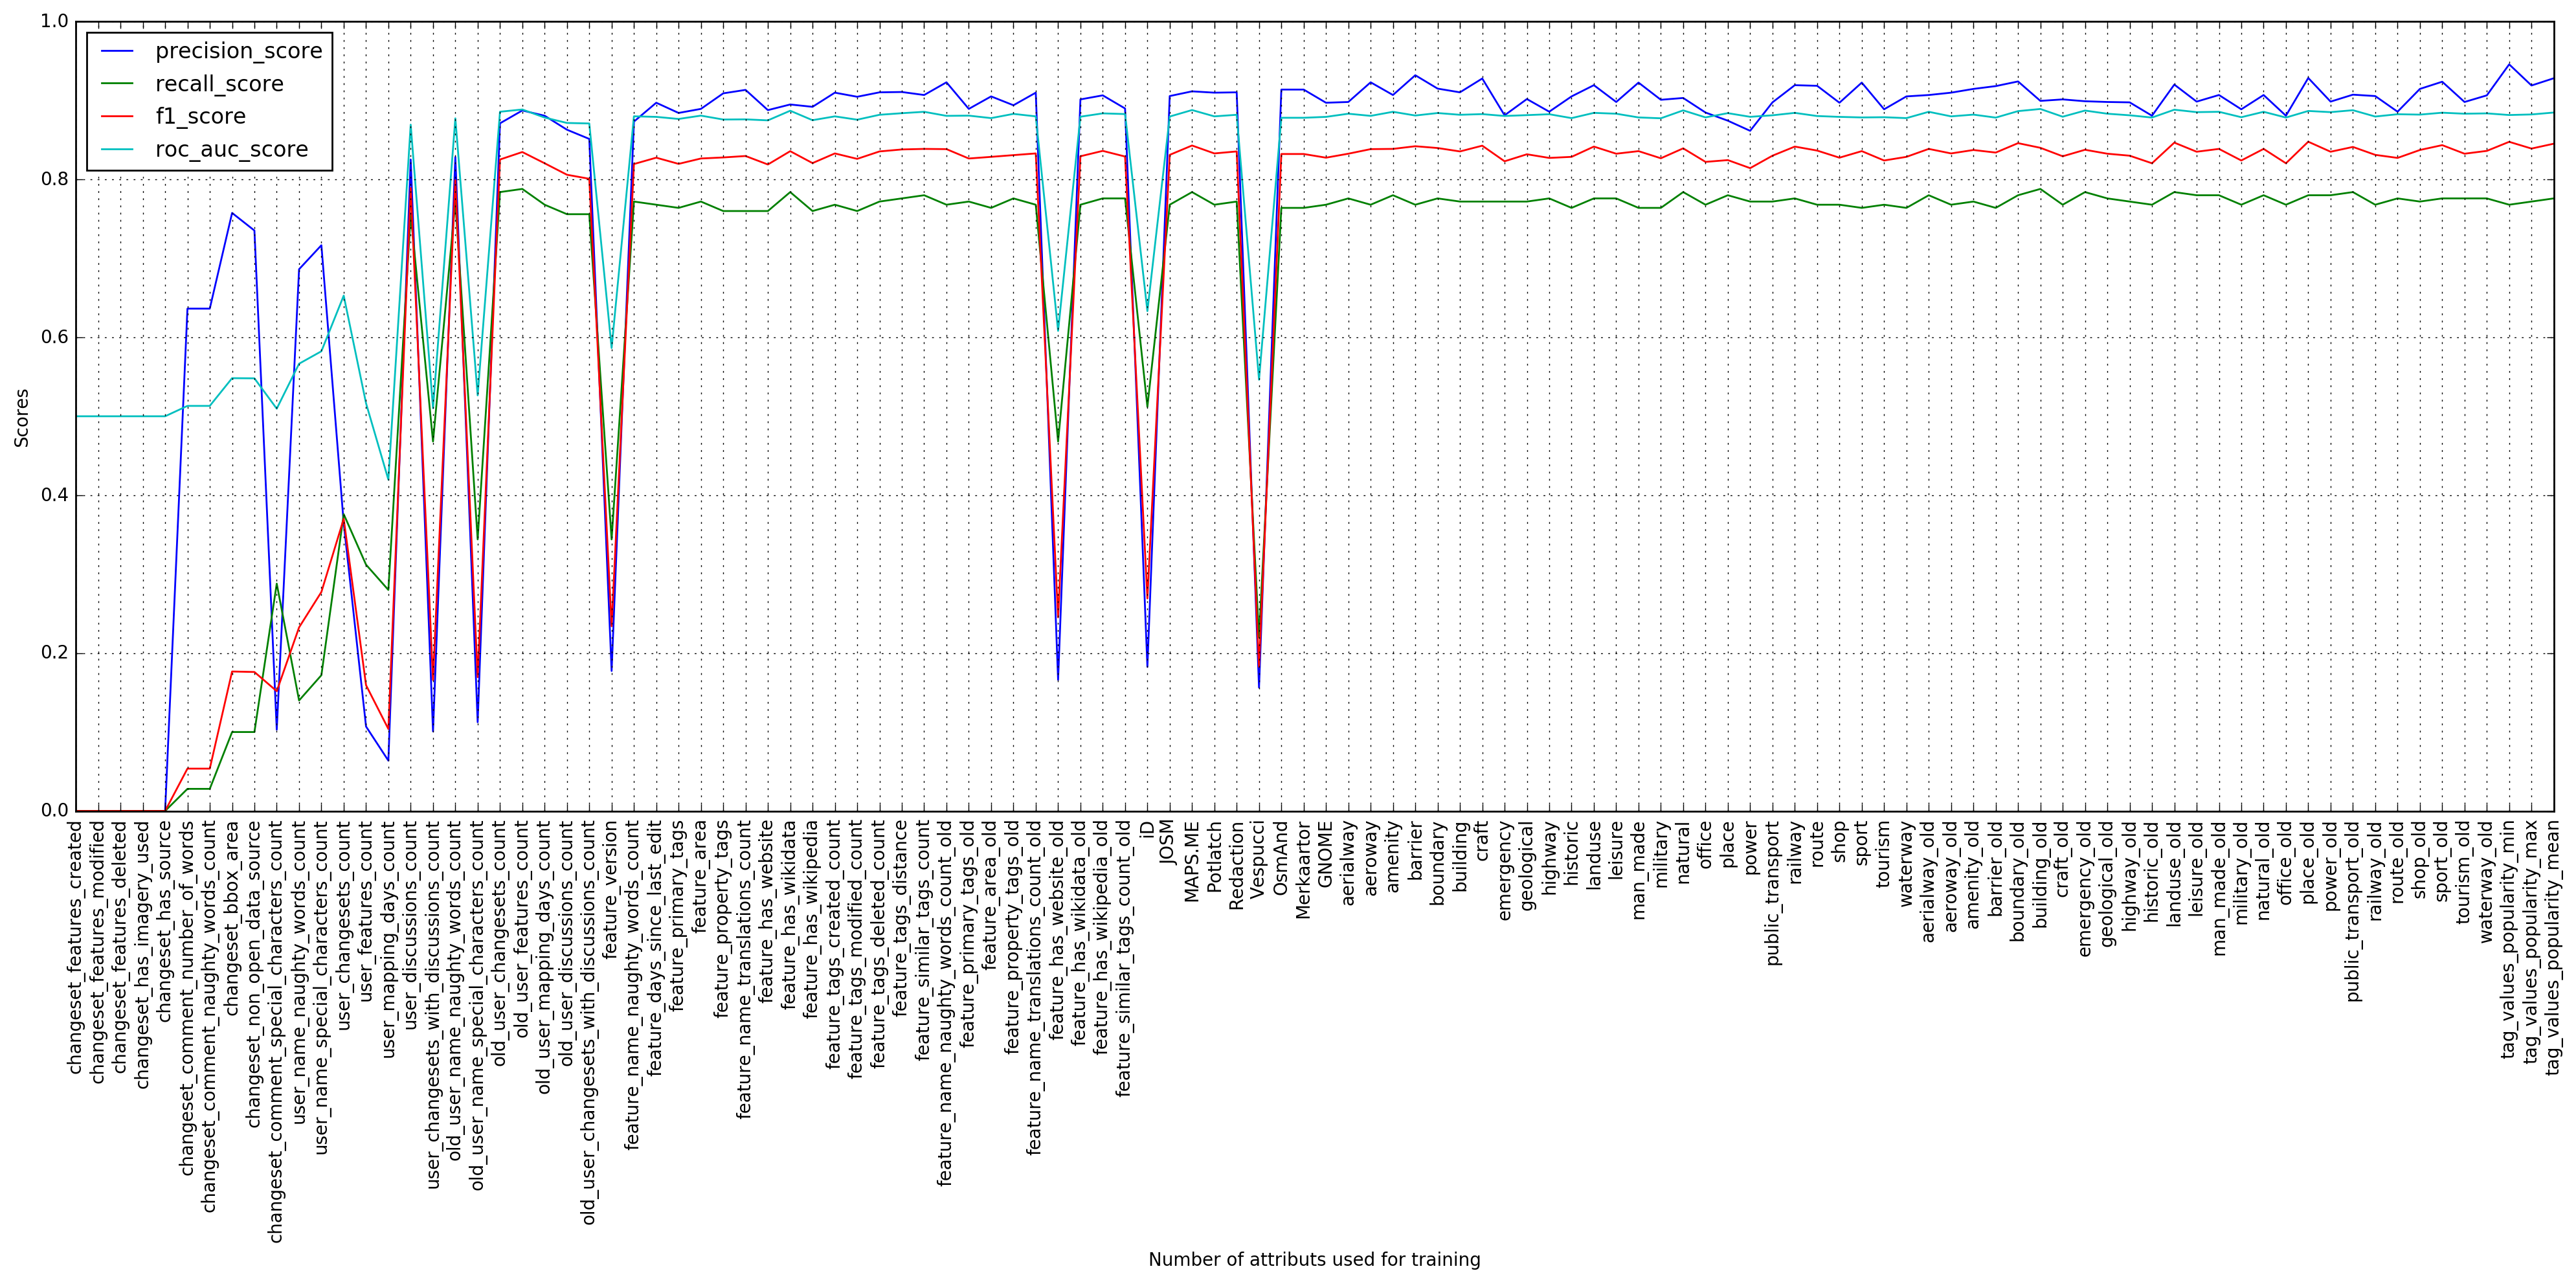

In [11]:
axes = scores.plot(figsize=(20, 10))

axes.set_xlabel('Number of attributs used for training')
axes.set_ylabel('Scores')
axes.set_ylim(0, 1)
axes.set_xticks(range(len(index)))
axes.set_xticklabels(labels=index, rotation=90)

plt.grid()
plt.tight_layout()

In [16]:
importances = pd.DataFrame(
    list(zip(X.columns, model.feature_importances_)),
    columns=['feature', 'importance']
)
importances = importances.sort(columns='importance', ascending=False)
importances.head()

,feature,importance
13,user_features_count,0.065305
26,feature_days_since_last_edit,0.055707
19,old_user_changesets_count,0.048538
20,old_user_features_count,0.046147
12,user_changesets_count,0.044021
5,changeset_comment_number_of_words,0.037422
111,tag_values_popularity_mean,0.037121
21,old_user_mapping_days_count,0.035511
14,user_mapping_days_count,0.031151
110,tag_values_popularity_max,0.030781


In [21]:
scores = []
index = []

# for i in range(len(training_attributes)):
for i in range(1, len(importances.feature.values)):
    training_attributes = importances.feature.values[:i]
    
    X = training[training_attributes]
    y = training['changeset_harmful']
    
    scaler = StandardScaler().fit(X)
    model = GradientBoostingClassifier(n_estimators=700, max_features='log2', learning_rate=0.5, random_state=5, max_depth=7)
    
    X_scaled = scaler.transform(X)
    y_model = model.fit(X_scaled, y)
    
    vX = validation[training_attributes]
    vy = validation['changeset_harmful']
    
    # Performance on validation dataset.
    vX_scaled = scaler.transform(vX)
    vy_model = model.predict(vX_scaled)
    
    score = [metric(vy, vy_model) for metric in [metrics.precision_score, metrics.recall_score, metrics.f1_score, metrics.roc_auc_score]]
    index.append(training_attributes[-1])
    scores.append(score)

In [22]:
scores = pd.DataFrame(scores, columns=['precision_score', 'recall_score', 'f1_score', 'roc_auc_score'], index=index)
print(scores.shape)
scores.head()

(111, 4)


,precision_score,recall_score,f1_score,roc_auc_score
user_features_count,0.721088,0.424,0.534005,0.703213
feature_days_since_last_edit,0.820276,0.712,0.762313,0.847642
old_user_changesets_count,0.858491,0.728,0.787879,0.857571
old_user_features_count,0.872038,0.736,0.798265,0.862213
user_changesets_count,0.849315,0.744,0.793177,0.864928


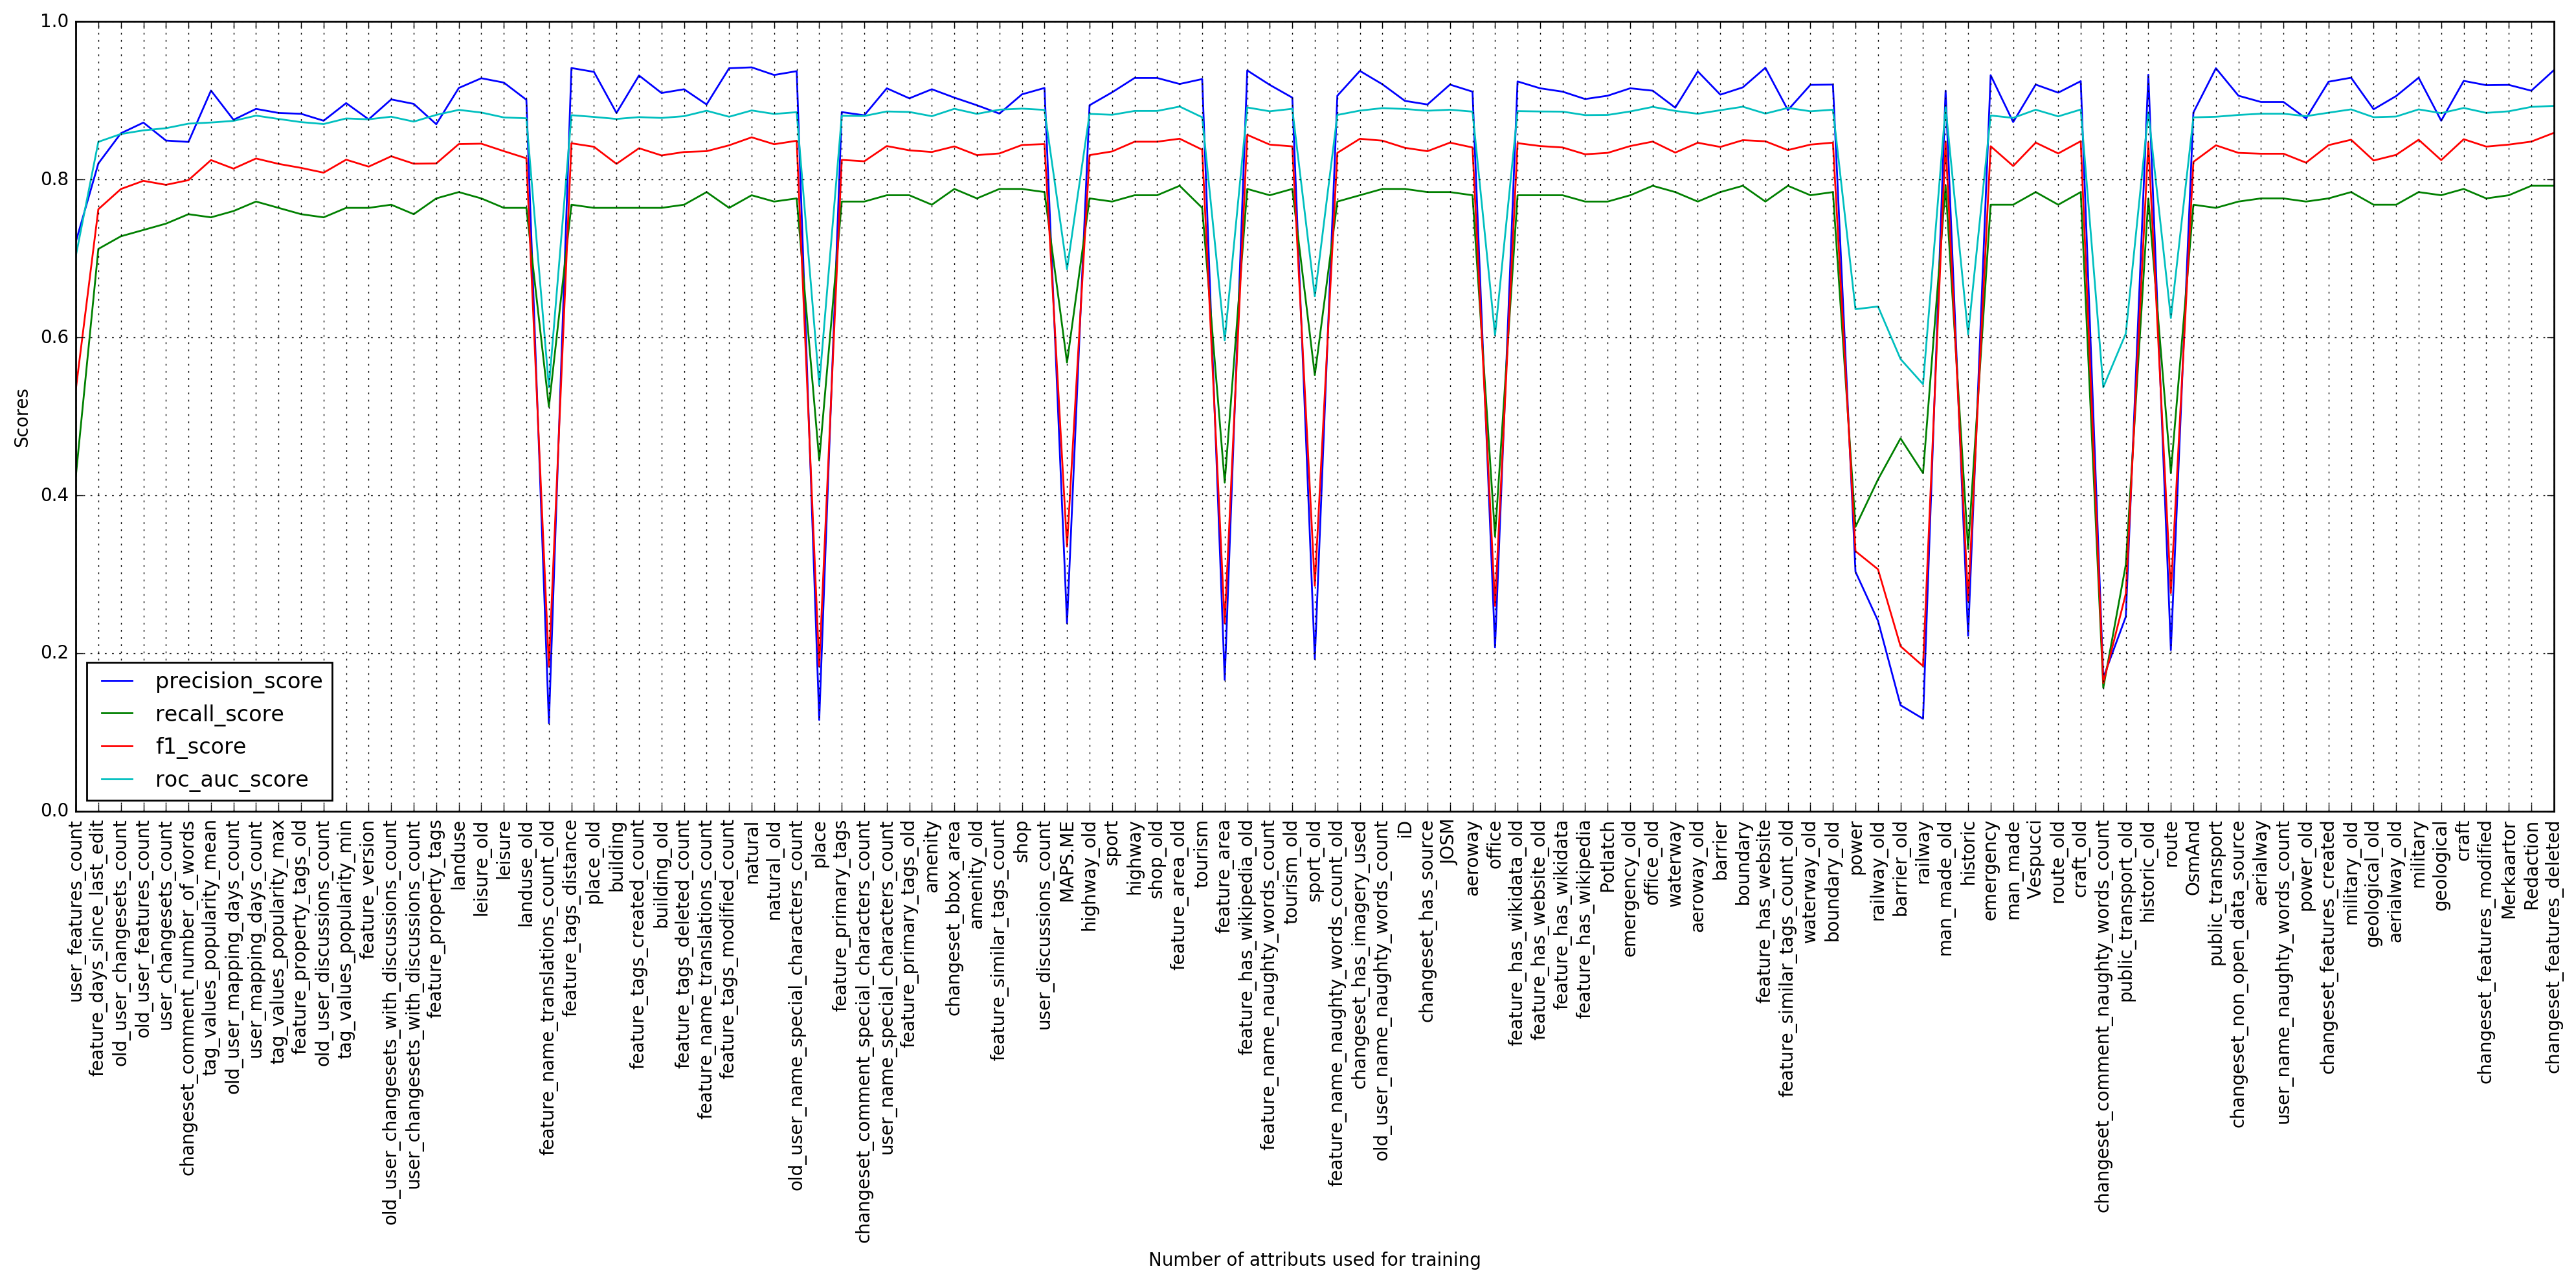

In [23]:
axes = scores.plot(figsize=(20, 10))

axes.set_xlabel('Number of attributs used for training')
axes.set_ylabel('Scores')
axes.set_ylim(0, 1)
axes.set_xticks(range(len(index)))
axes.set_xticklabels(labels=index, rotation=90)

plt.grid()
plt.tight_layout()